**Keras** es una API escrita en Python que nos permite de una forma rápida y cómoda configurar y entrenar redes neuronales. Keras traslada el cálculo de la CPU a la GPU.

Todo el cálculo que realiza la red para generar una salida es computacionalmente muy alto. Son muchísimas las multiplicaciones y sumas que se llevan a cabo. Pero, afortunadamente, la inmensa mayoría de estas operaciones son paralelizables. Y, de la misma forma que los juegos actuales utilizan la GPU para poder mover rápidamente una inmensa cantidad de puntos, vértices y polígonos, esta misma arquitectura de computación paralela se adapta perfectamente a las necesidades de cálculo de las redes neuronales.

Por supuesto, cuando las redes y sus conjuntos de datos son pequeños no es indispensabe disponer de GPU. Pero cuando el modelo o los datos crecen mucho el tiempo de cómputo se vuele esencial.

Keras, a su vez, se apoya en otras herramientas como son **Tensorflow** o **CUDA** (si disponemos de GPU).

Podemos consultar https://keras.io/#installation para instalar **Keras**. Antes debes instalar [**Tensorflow**](https://www.tensorflow.org/install). Para disponer de un espacio con todo ya instalado y con acceso a GPU podemos usar **Google Colab**.

# Usar Keras en modo local

**Modo rápido**: Lo habitual, es realizar una instalación limpia de Keras mediante un entorno virtual (recomendable).

Instala virtualenv

`pip install virtualenv`

Crea el entorno virtual

`virtualenv nombre_de_tu_entorno -p python3`

Activa el entorno virtual

`nombre_de_tu_entorno\Scripts\activate.bat`

Dentro del entorno, instala Tensorflow:

`pip install tensorflow`

y luego, Keras:

`pip install keras`

Una vez realizados los pasos, abriremos el proyecto con algún IDE, PyCharm (recordad que la versión Community no permite usar cuadernos de Jupyter) o Visual Studio Code. También podemos hacerlo como habitualmente con **Poetry**. Podemos usar cuadernos de Jupyter o no. La forma habitual de trabajar con redes neuronales es usando éstos, por lo que se hace necesario instalar la librería que hemos usado siempre: **ipykernel**.

# Creación del modelo

La estructura principal de **Keras** se llama modelo, y es una forma de organizar y conectar capas de neuronas.

El modelo mas simple se llama **modelo secuencial**, que es una pila líneal de capas.

Para arquitecturas más complejas, es necesario usar la API funcional de Keras, que permite crear conexiones arbitrarias.

In [1]:
from keras.models import Sequential

model = Sequential() # Creamos un modelo de red neuronal vacio

Usamos `.add()` para aplilar capas. **Keras** denomina a las **capas neuronales básicas** como densas (**Dense**), lo que significa que todas las entradas son conectadas a todas las neuronas.

Como observamos en la figura siguiente, todas las `n` entradas se conectan a todas las `m` neuronas. Veremos más adelante que esto no siempre es así. Hay capas denominadas **convolutivas**(o convolucionales) que no siguen este patrón de conexión, sino que parte de las entradas se conectan solo a algunas neuronas de la capa.

In [2]:
from keras.layers import Dense

model.add(Dense(units=5, activation='sigmoid', input_dim=4)) # Son 4 entradas conectadas a 5 neuronas (crea la capa oculta y la de entrada)
model.add(Dense(units=3, activation='softmax')) # Capa de salida, 5 entradas conectadas a 3 neuronas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Configuracón del entrenamiento

Ahora especificaremos el proceso de aprendizaje.

Necesitamos como mínimo tres cosas:

Tenemos que indicar que **función de error** o **pérdida (loss)** vamos a usar.

La más común es **mse** (error cuadrático medio - mean squared error). `loss='mse'`

Debemos configurar el optimizador. En este primer ejemplo será el descenso del gradiente `optimizer=keras.optimizers.SFD(learning_rate=1)` (stochastic gradient descent) al que **epescificamos una tasa de aprendizaje** de 1.
Básicamente, esta configuración es ka del algoritmo de retropropagación básico.  

En este contexto, **estocástico** significa que no vamos a calcular el error sobre todo el conjunto de muestras en cada iteración sino sobre un subconjunto aleatorio de ellos. Ese subconjunto corresponde a un **mini-batch**, un mini-lote de ejemplos aleatorio, para no evaluar todos en todas las iteraciones y rebajar el coste computacional, a la vez que exploramos más direcciones de gradiente.

Mientras se produce el entrenamiento se debe verificar que la función de error va disminuyendO. Para ello se va comprobando el valor de loss. Pero, es un valor que por sí solo no indica nada, si es baja es buena señal.

Medimos cuanto mejoramos con el accuracy (precisión). `metrics=['accuracy']`

In [4]:
import keras

model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

# Preparación de los datos.

Entrenamiento, validación y test.

In [6]:
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris_x_normalized = normalize(iris_X, axis=0)

# 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(iris_x_normalized, iris_y, test_size=0.2, shuffle=True)

# Convert classes from categorical ('Setosa', 'Versicolor', 'Virginica')
# to numerical (0, 1, 2) and then to one-hot encoded ([1, 0, 0], [0, 1, 0], [0, 0, 1]).
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Pa comprobar que todo esta bien (ver los datos)
examples = []
for i in range(len(x_train)):
    examples.append([x_train[i], y_train[i]])
print(examples)

[[array([0.08439845, 0.07403367, 0.0924826 , 0.06901454]), array([0., 1., 0.])], [array([0.06917906, 0.09254209, 0.02558029, 0.01725364]), array([1., 0., 0.])], [array([0.07748055, 0.06610149, 0.07674088, 0.06326333]), array([0., 1., 0.])], [array([0.10238501, 0.07403367, 0.12003061, 0.10927303]), array([0., 0., 1.])], [array([0.08024771, 0.07138961, 0.07674088, 0.06901454]), array([0., 1., 0.])], [array([0.06917906, 0.07932179, 0.03148344, 0.01150242]), array([1., 0., 0.])], [array([0.0664119 , 0.07932179, 0.02754801, 0.00575121]), array([1., 0., 0.])], [array([0.09269994, 0.08196585, 0.0924826 , 0.08626818]), array([0., 1., 0.])], [array([0.06917906, 0.08725397, 0.02754801, 0.01150242]), array([1., 0., 0.])], [array([0.09269994, 0.08725397, 0.11215975, 0.1437803 ]), array([0., 0., 1.])], [array([0.06364474, 0.09518615, 0.01967715, 0.01150242]), array([1., 0., 0.])], [array([0.07886413, 0.06610149, 0.09838575, 0.11502424]), array([0., 0., 1.])], [array([0.08024771, 0.07138961, 0.10035

# Entrenamiento
Método fit, pero debemos especificar número de épocas y `batch_size`.

In [8]:
history = model.fit(x_train, y_train, epochs=200, batch_size=15)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5832 - loss: 0.1940 
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 0.1861 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.1894 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - loss: 0.1879 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.1946 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.1863 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 0.1894 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 0.1864 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.1792 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 0.1826 
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6331 - loss: 0.1790 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - los

# Visualización

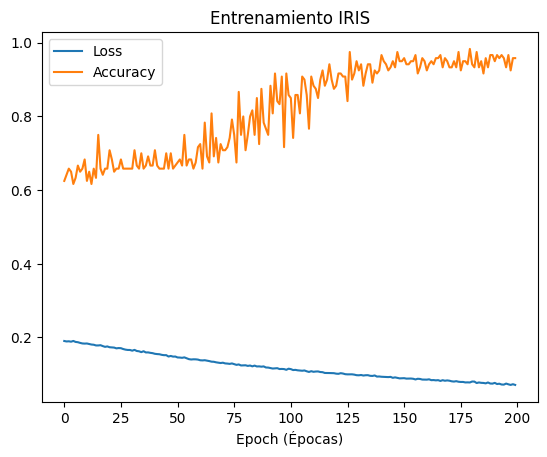

In [9]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Entrenamiento IRIS')
plt.xlabel('Epoch (Épocas)')
plt.legend(loc='upper left')
plt.show()

# Test

In [10]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test, verbose=1)) # 'verbose=1' saca un resumen de los parametros

['loss', 'compile_metrics']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9667 - loss: 0.0720
[0.07199373841285706, 0.9666666388511658]


# Producción

In [17]:
import numpy as np

predictions = np.round(model.predict(x_test), 2) # '2' redondea a  dos decimales
print(f"Salida desada: {y_test[2]}") #  ('Setosa', 'Versicolor', 'Virginica')
print(f"Salida real: {predictions[2]}") #  ('Setosa', 'Versicolor', 'Virginica')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Salida desada: [0. 0. 1.]
Salida real: [0.   0.15 0.85]


In [18]:
# Muestra todas las predicciones
for p, l in zip(np.round(predictions, 3), y_test): # 'zip' es como usar dos 'for'
    if np.argmax(p) == np.argmax(l):
        print(p, "->", l)
    else:
        print(p, "->", l, "✘")

[0.77 0.21 0.01] -> [1. 0. 0.]
[0.   0.19 0.81] -> [0. 0. 1.]
[0.   0.15 0.85] -> [0. 0. 1.]
[0.13 0.57 0.31] -> [0. 1. 0.]
[0.08 0.53 0.39] -> [0. 1. 0.]
[0.83 0.16 0.01] -> [1. 0. 0.]
[0.01 0.31 0.68] -> [0. 0. 1.]
[0.08 0.53 0.4 ] -> [0. 1. 0.]
[0.12 0.56 0.32] -> [0. 1. 0.]
[0.84 0.15 0.01] -> [1. 0. 0.]
[0.02 0.35 0.63] -> [0. 0. 1.]
[0.85 0.14 0.01] -> [1. 0. 0.]
[0.8  0.19 0.01] -> [1. 0. 0.]
[0.08 0.53 0.39] -> [0. 1. 0.]
[0.8  0.19 0.01] -> [1. 0. 0.]
[0.04 0.45 0.5 ] -> [0. 0. 1.]
[0.82 0.17 0.01] -> [1. 0. 0.]
[0.01 0.27 0.72] -> [0. 0. 1.]
[0.05 0.47 0.48] -> [0. 0. 1.]
[0.1  0.55 0.35] -> [0. 1. 0.]
[0.15 0.57 0.27] -> [0. 1. 0.]
[0.01 0.27 0.73] -> [0. 0. 1.]
[0.03 0.39 0.58] -> [0. 0. 1.]
[0.76 0.22 0.01] -> [1. 0. 0.]
[0.15 0.57 0.28] -> [0. 1. 0.]
[0.05 0.47 0.48] -> [0. 1. 0.] ✘
[0.01 0.24 0.75] -> [0. 0. 1.]
[0.02 0.34 0.65] -> [0. 0. 1.]
[0.   0.21 0.79] -> [0. 0. 1.]
[0.01 0.28 0.71] -> [0. 0. 1.]
